<a href="https://colab.research.google.com/github/NiyonshutiDavid/normal_distribution-Group_2/blob/Jean/normal_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part 1: Normal Distribution - Definition, Implementation, and Analysis

## Part 2: Bayesian Probability - Implementation, and inference

**bold text**### Part 2: Bayesian Probability - Planning a Family Picnic

#### Problem Statement
You are planning a family picnic, but you're concerned about the weather. You want to determine the probability that it will rain on the day of the picnic based on the weather forecast and historical data.
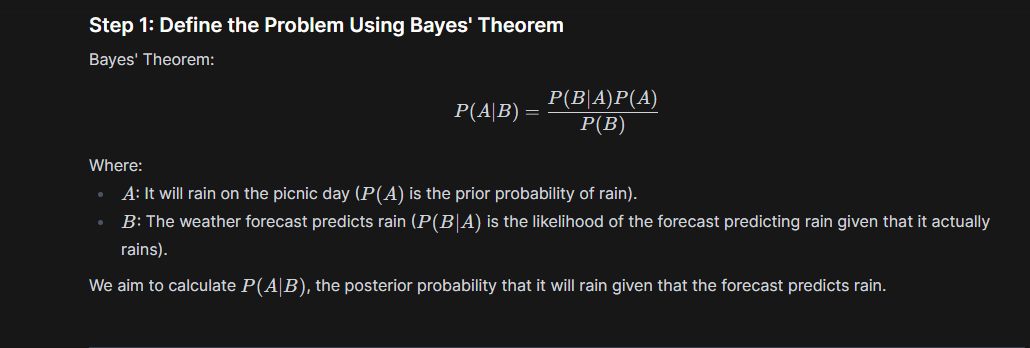
---


---

### Step 2: Assign Probabilities Based on Historical Data

1. **Prior Probability (\( P(A) \))**:
   Historically, it rains on 20% of days in your region. Thus:
   \[
   P(A) = 0.2
   \]

2. **Likelihood (\( P(B|A) \))**:
   If it rains, the weather forecast correctly predicts rain 90% of the time. Thus:
   \[
   P(B|A) = 0.9
   \]

3. **Marginal Likelihood (\( P(B) \))**:
   The weather forecast predicts rain regardless of whether it actually rains or not. To compute \( P(B) \), we use the law of total probability:
   \[
   P(B) = P(B|A)P(A) + P(B|\neg A)P(\neg A)
   \]
   Here:
   - \( P(\neg A) = 1 - P(A) = 0.8 \) (probability that it does not rain).
   - \( P(B|\neg A) = 0.1 \) (the forecast incorrectly predicts rain when it does not rain).

   Substituting values:
   \[
   P(B) = (0.9)(0.2) + (0.1)(0.8) = 0.18 + 0.08 = 0.26
   \]

4. **Posterior Probability (\( P(A|B) \))**:
   Using Bayes' Theorem:
   \[
   P(A|B) = \frac{P(B|A)P(A)}{P(B)} = \frac{(0.9)(0.2)}{0.26} = \frac{0.18}{0.26} \approx 0.6923
   \]

Thus, the probability that it will rain given that the forecast predicts rain is approximately **69.23%**.



#Step 3: Implementation in Python




### Step 4: Explanation of Results



---

### Step 5: Practical Significance


---

### Visualization of Probabilities

To visualize the probabilities, you can plot the prior, likelihood, and posterior distributions.



**Second real-world Example: Bayes' Theorem for Scoring a Goal in a Penalty**

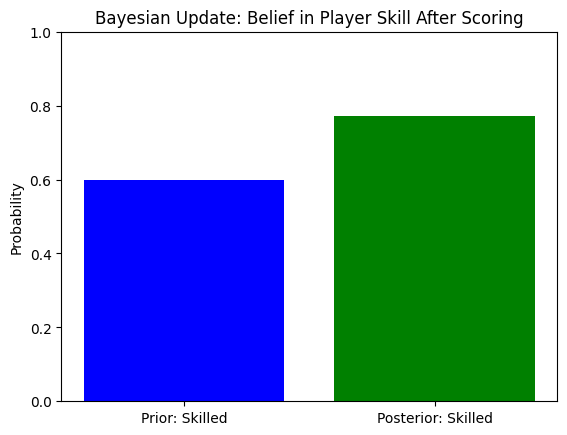

Prior belief that the player is skilled: 0.60
Updated belief after scoring (Posterior): 0.77


In [3]:
import numpy as np
import matplotlib.pyplot as plt

def bayes_update(prior, likelihood, prob_B):
    """Compute the posterior probability using Bayes' Theorem."""
    return (likelihood * prior) / prob_B

# Given probabilities
P_A = 0.6  # Prior: belief that the player is skilled
P_B_given_A = 0.9  # Likelihood: skilled player scores
P_B_given_not_A = 0.4  # Unskilled player scores
P_not_A = 1 - P_A  # Complement of prior

# Total probability of scoring
P_B = (P_B_given_A * P_A) + (P_B_given_not_A * P_not_A)

# Compute posterior
P_A_given_B = bayes_update(P_A, P_B_given_A, P_B)

# Visualization
labels = ['Prior: Skilled', 'Posterior: Skilled']
values = [P_A, P_A_given_B]
plt.bar(labels, values, color=['blue', 'green'])
plt.ylim(0, 1)
plt.ylabel('Probability')
plt.title('Bayesian Update: Belief in Player Skill After Scoring')
plt.show()

# Print results
print(f"Prior belief that the player is skilled: {P_A:.2f}")
print(f"Updated belief after scoring (Posterior): {P_A_given_B:.2f}")

## Part 3: Gradient Descent in Code - Simple Model Plotting

In [ ]:
import numpy as np

# Get user inputs for initial values
m = float(input("Enter initial value of m: "))  # Initial slope
b = float(input("Enter initial value of b: "))  # Initial y-intercept
alpha = float(input("Enter learning rate (alpha): "))  # Step size for updates
num_iterations = int(input("Enter maximum number of iterations: "))  # Iteration limit
tolerance = float(input("Enter convergence tolerance (e.g., 0.0001): "))  # Stopping condition

# Collect data points from user
num_points = int(input("Enter the number of data points: "))
x_values = []
y_values = []

for i in range(num_points):
    x = float(input(f"Enter x value for point {i+1}: "))
    y = float(input(f"Enter y value for point {i+1}: "))
    x_values.append(x)
    y_values.append(y)

# Convert lists to NumPy arrays for efficient computation
X = np.array(x_values)
Y = np.array(y_values)
n = len(X)  # Number of data points

def compute_cost(m, b, X, Y):
    """
    Computes the Mean Squared Error (MSE) cost function.

    Args:
        m (float): Slope of the line.
        b (float): Intercept of the line.
        X (numpy.ndarray): Feature values.
        Y (numpy.ndarray): Target values.

    Returns:
        float: Mean Squared Error (MSE).
    """
    y_pred = m * X + b  # Predicted values
    error = Y - y_pred  # Differences from actual values
    return np.mean(error ** 2)  # Compute MSE

def gradient_descent(m, b, alpha, num_iterations, tolerance, X, Y):
    """
    Performs gradient descent optimization to find the best-fit line.

    Args:
        m (float): Initial slope.
        b (float): Initial y-intercept.
        alpha (float): Learning rate.
        num_iterations (int): Maximum number of iterations.
        tolerance (float): Stopping condition for small cost changes.
        X (numpy.ndarray): Feature values.
        Y (numpy.ndarray): Target values.

    Returns:
        tuple: Optimized values of m and b.
    """
    prev_cost = float('inf')  # Initial high cost

    for iteration in range(1, num_iterations + 1):
        # Compute predictions
        y_pred = m * X + b
        error = Y - y_pred  # Residual error

        # Compute gradients using vectorized operations
        gradients_m = (-2/n) * np.sum(error * X)
        gradients_b = (-2/n) * np.sum(error)

        # Update parameters
        m -= alpha * gradients_m
        b -= alpha * gradients_b

        # Compute new cost
        cost = np.mean(error ** 2)  # MSE

        # Display updates for each iteration
        print(f"Iteration {iteration}: m = {m:.5f}, b = {b:.5f}, Cost = {cost:.6f}")

        # Check for convergence
        if abs(prev_cost - cost) < tolerance:
            print(f"Convergence reached at iteration {iteration}. Stopping optimization.")
            break

        prev_cost = cost  # Update previous cost for next iteration

    return m, b  # Return optimized values

# Run Gradient Descent
final_m, final_b = gradient_descent(m, b, alpha, num_iterations, tolerance, X, Y)

# Compute and display final predictions
print("\nFinal Predictions:")
for x, y in zip(X, Y):
    y_pred = final_m * x + final_b
    print(f"For x = {x}, Predicted y = {y_pred:.5f}, Actual y = {y}")

Iteration 1: m = 1.70000, b = 2.10000, Cost = 36.500000
Iteration 2: m = 1.26000, b = 1.90000, Cost = 1.040000
Iteration 3: m = 1.34000, b = 1.91600, Cost = 0.064000

Final Predictions:
For x = 1.0, Predicted y = 3.25600, Actual y = 3.0
For x = 3.0, Predicted y = 5.93600, Actual y = 6.0
